In [2]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Rrod_tolerance.csv','r')
rdr = csv.reader(file)
Rod39 = [[],[],[],[]]
Rod40 = [[],[],[],[]]
Rod41 = [[],[],[],[]]

for line in rdr:
    if (int(line[1]) == 41):
        Rod41[0].append(float(line[2]))
        Rod41[1].append(float(line[4]))
        Rod41[2].append(float(line[-2]))
        Rod41[3].append(float(line[-1]))
    elif (int(line[1]) == 39):
        Rod39[0].append(float(line[2]))
        Rod39[1].append(float(line[4]))
        Rod39[2].append(float(line[-2]))
        Rod39[3].append(float(line[-1]))
    elif (int(line[1]) == 40):
        Rod40[0].append(float(line[2]))
        Rod40[1].append(float(line[4]))
        Rod40[2].append(float(line[-2]))
        Rod40[3].append(float(line[-1]))
file.close()

for i in range(0,4):
    Rod39[i].reverse()
    Rod40[i].reverse()
    Rod41[i].reverse()




[1.36946500e-18 2.21095923e-11 3.94652453e-05 7.78862132e+00]


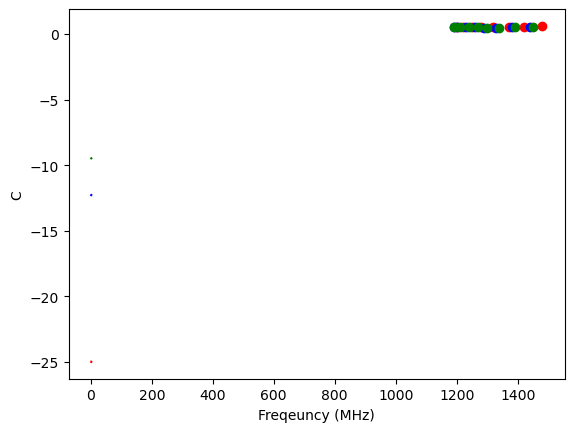

In [16]:
def func_3(x,a,b,c,d):
    return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def func_2(x,a,b,c):
    return a*np.power(x,2)+b*np.power(x,1)+c

x_39, x_40, x_41 = Rod39[0], Rod40[0], Rod41[0]
y1_39, y1_40, y1_41 = Rod39[1], Rod40[1], Rod41[1]
freq_range = np.linspace(1.18,1.50,320)
plt.plot(x_39,y1_39,'ro')
plt.plot(x_40,y1_40,'bo')
plt.plot(x_41,y1_41,'go')
popt_39, pcov_39 = curve_fit(func_3,x_39,y1_39)
plt.plot(freq_range,func_3(freq_range,*popt_39),'r-', label = 'Rrod = 39 cm')
popt_40, pcov_40 = curve_fit(func_3,x_40,y1_40)
plt.plot(freq_range,func_3(freq_range,*popt_40),'b-')
popt_41, pcov_41 = curve_fit(func_3,x_41,y1_41)
plt.plot(freq_range,func_3(freq_range,*popt_41),'g-')
print(np.diag(pcov_39))
plt.xlabel('Freqeuncy (GHz)')
plt.ylabel('C')
plt.show()

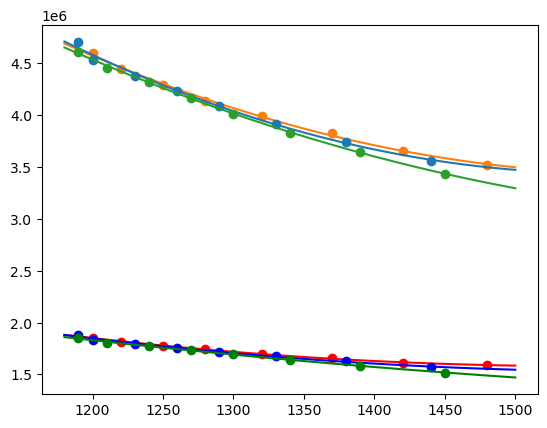

In [11]:
y2_39, y2_40, y2_41 = Rod39[2], Rod40[2], Rod41[2]
y3_39, y3_40, y3_41 = Rod39[3], Rod40[3], Rod41[3]
plt.plot(x_39,y2_39,'ro')
plt.plot(x_39,y3_39,marker='o',color='C1',linestyle = 'none')
Qtot_opt_39, Qtot_cov_39 = curve_fit(func_2,x_39,y2_39)
plt.plot(freq_range,func_2(freq_range,*Qtot_opt_39),'r-')
Qrod_opt_39, Qrod_cov_39 = curve_fit(func_2,x_39,y3_39)
plt.plot(freq_range,func_2(freq_range,*Qrod_opt_39),linestyle = '-', color = 'C1')

plt.plot(x_40,y2_40,'bo')
plt.plot(x_40,y3_40,marker='o',color='C0',linestyle = 'none')
Qtot_opt_40, Qtot_cov_40 = curve_fit(func_2,x_40,y2_40)
plt.plot(freq_range,func_2(freq_range,*Qtot_opt_40),'b-')
Qrod_opt_40, Qrod_cov_40 = curve_fit(func_2,x_40,y3_40)
plt.plot(freq_range,func_2(freq_range,*Qrod_opt_40),linestyle = '-', color = 'C0')

plt.plot(x_41,y2_41,'go')
plt.plot(x_41,y3_41,marker='o',color='C2',linestyle = 'none')
Qtot_opt_41, Qtot_cov_41 = curve_fit(func_2,x_41,y2_41)
plt.plot(freq_range,func_2(freq_range,*Qtot_opt_41),'g-')
Qrod_opt_41, Qrod_cov_41 = curve_fit(func_2,x_41,y3_41)
plt.plot(freq_range,func_2(freq_range,*Qrod_opt_41),linestyle = '-', color = 'C2')